In [12]:
from skimage import data,color,io
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import trange, tqdm
from skimage import feature
from skimage import feature, transform
from scipy import signal
from skimage.color import  rgb2gray

In [2]:
img_right = io.imread('tsukubaright.jpg')
img_left = io.imread('tsukubaleft.jpg')

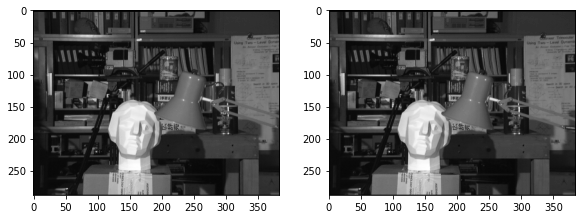

In [3]:
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(img_left,cmap='gray')
plt.subplot(132)
plt.imshow(img_right,cmap='gray')

In [4]:
height, width = img_right.shape
disp_min = 0
disp_max = 16
windows_size = 9
disp_map = np.zeros((height,width))
w = windows_size // 2

In [10]:
def Map(mode):
    for i in tqdm(range(w,height),'Row progress'):
        for j in range(w,width-disp_max-w):
            min_val = np.inf
            position = 0
            right_window = img_right[i-w:i+w,j-w:j+w]
            for k in range(disp_min,disp_max):
                left_window  = img_left[i-w:i+w,j-w+k :j+w+k]
                if mode == "norm":
                    dif = np.sum((left_window - right_window) **2) ** (1/2)
                elif mode == "abs":
                    dif = np.sum(np.abs(left_window - right_window))
                elif mode == "square":
                    dif = np.sum((left_window - right_window) **2)
                elif mode == "hamming":
                    xor = np.bitwise_xor((right_window*255).astype(np.uint8),
                                         (left_window*255).astype(np.uint8))
                    bit_dif = np.unpackbits(xor)
                    dif  = np.sum(bit_dif)
                if min_val > dif:
                    min_val = dif
                    position = k
            disp_map[i,j] = position

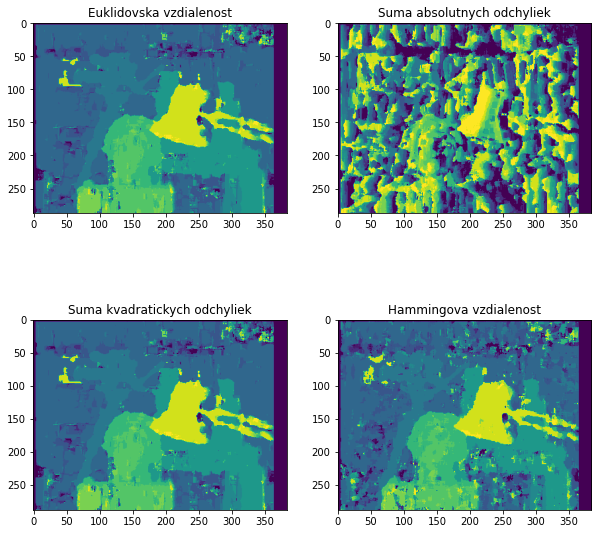

In [11]:
plt.figure(figsize= (10, 10))
plt.subplot(221)
plt.title("Euklidovska vzdialenost")
Map("norm")
plt.imshow(disp_map)

plt.subplot(222)
plt.title("Suma absolutnych odchyliek")
Map("abs")
plt.imshow(disp_map)

plt.subplot(223)
plt.title("Suma kvadratickych odchyliek")
Map("square")
plt.imshow(disp_map)

plt.subplot(224)
plt.title("Hammingova vzdialenost")
Map("hamming")
plt.imshow(disp_map)

<ipython-input-14-33f7a9e7f561>:21: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  right_window = rgb2gray(transform.rotate(img_right[i - w:i + w, j - w:j + w], 180))
<ipython-input-14-33f7a9e7f561>:23: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  left_window  = rgb2gray(img_left[i - w:i + w, j - w + k:j + w + k])


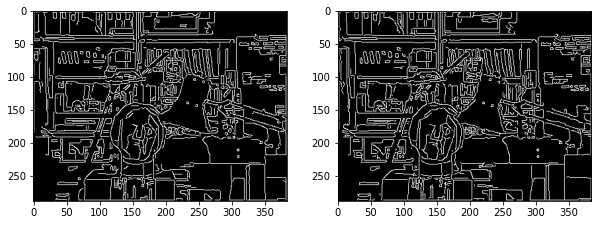

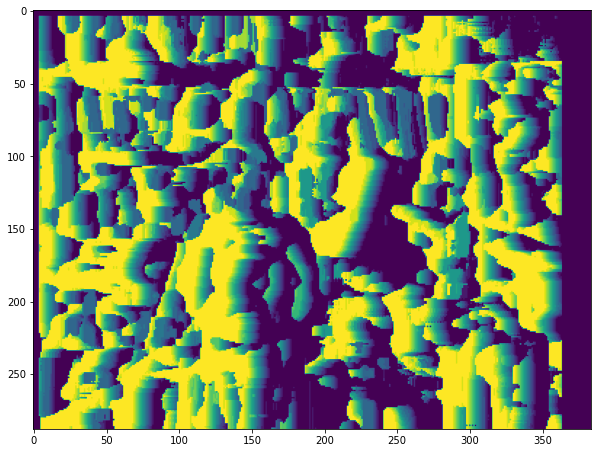

In [14]:
img_right_edge = feature.canny(img_right)
img_left_edge = feature.canny(img_left)

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_left_edge,cmap='gray')
plt.subplot(122)
plt.imshow(img_right_edge,cmap='gray')

height, width = img_right.shape
disp_min = 0
disp_max = 16
windows_size = 9
disp_map = np.zeros((height,width))
w = windows_size // 2

for i in tqdm(range(w, height), 'Row progress'):
    for j in range(w, width - disp_max - w):
        min_val = np.inf * - 1
        position = 0
        right_window = rgb2gray(transform.rotate(img_right[i - w:i + w, j - w:j + w], 180))
        for k in range(disp_min, disp_max):
            left_window  = rgb2gray(img_left[i - w:i + w, j - w + k:j + w + k])
            dif = signal.convolve(left_window, right_window, mode= 'valid')
            if min_val < dif:
                    min_val = dif
                    position = k
            disp_map[i, j] = position

plt.figure(figsize=(10,10))
plt.imshow(disp_map)